In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv(r"C:\Users\Harshit Gupta\Downloads\Fligh-Price-Prediction\Cleaned.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,3,2019,22,20,1,10,2,50.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,1,5,2019,5,50,13,15,7,25.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No Info,13882,9,6,2019,9,25,4,25,19h,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1,No Info,6218,12,5,2019,18,5,23,30,5,25.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1,No Info,13302,1,3,2019,16,50,21,35,4,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2:30,0,No Info,4107,9,4,2019,19,55,22,25,2,30.0
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2:35,0,No Info,4145,27,4,2019,20,45,23,20,2,35.0
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No Info,7229,27,4,2019,8,20,11,20,3h,NaN
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2:40,0,No Info,12648,1,3,2019,11,30,14,10,2,40.0


In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,3,2019,22,20,1,10,2,50.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,1,5,2019,5,50,13,15,7,25.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No Info,13882,9,6,2019,9,25,4,25,19h,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1,No Info,6218,12,5,2019,18,5,23,30,5,25.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1,No Info,13302,1,3,2019,16,50,21,35,4,45.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  int64  
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  int64  
 11  Day              10682 non-null  int64  
 12  Month            10682 non-null  int64  
 13  Year             10682 non-null  int64  
 14  Dep_Hr           10682 non-null  int64  
 15  Dep_Min          10682 non-null  int64  
 16  Arr_Hr           10682 non-null  int64  
 17  Arr_Min     

In [5]:
df.describe()

,Total_Stops,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,9650.00000
mean,0.824190,9087.214567,13.509081,4.708575,2019.0,12.491013,24.409287,13.349186,24.690601,31.35544
std,0.675229,4611.548810,8.479363,1.164408,0.0,5.748820,18.767801,6.859317,16.506808,14.93004
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,5.00000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,20.00000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,30.00000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,45.00000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,55.00000


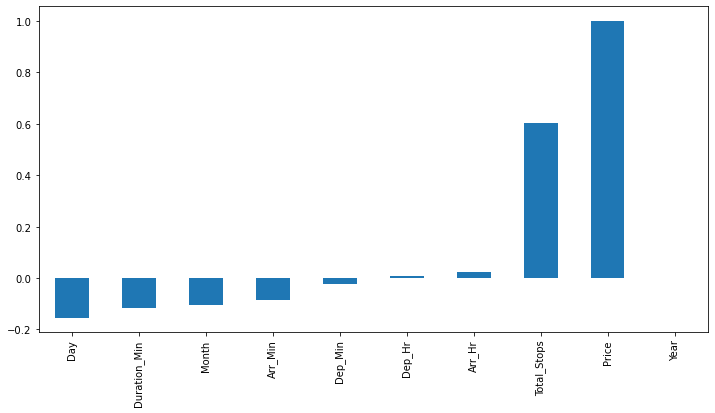

In [6]:
plt.figure(figsize=(12,6))
df.corr()['Price'].sort_values().plot(kind='bar');

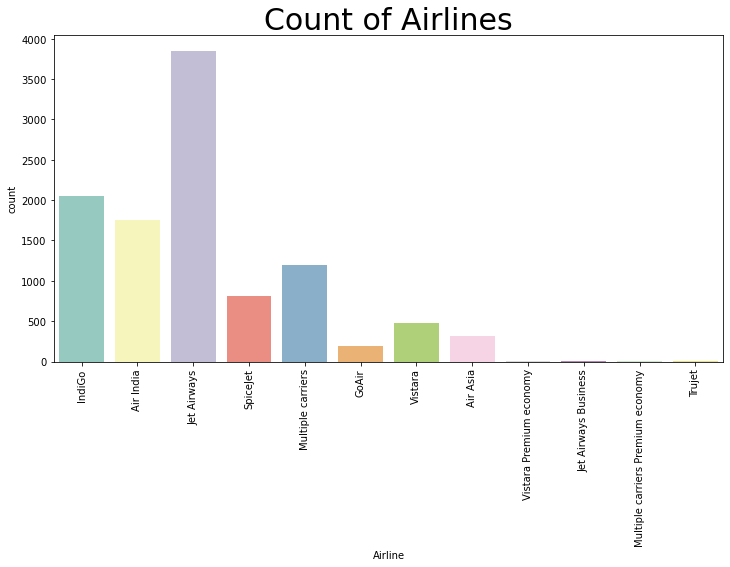

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

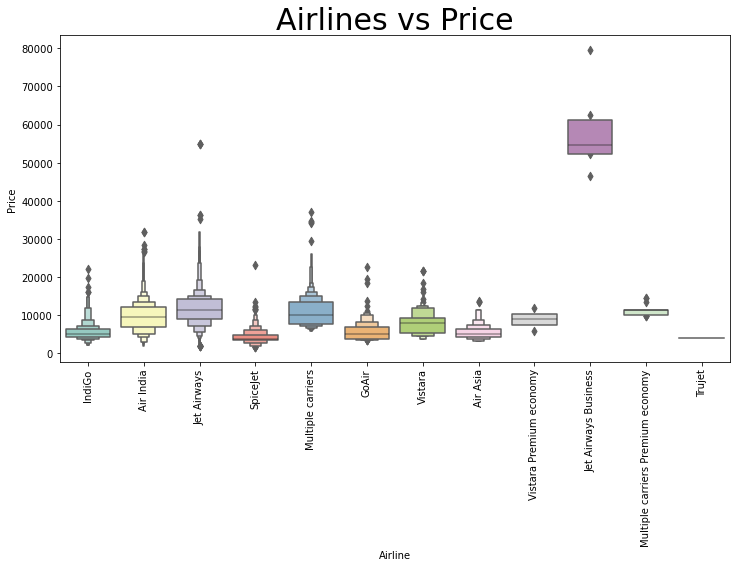

In [8]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Airline'], df['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

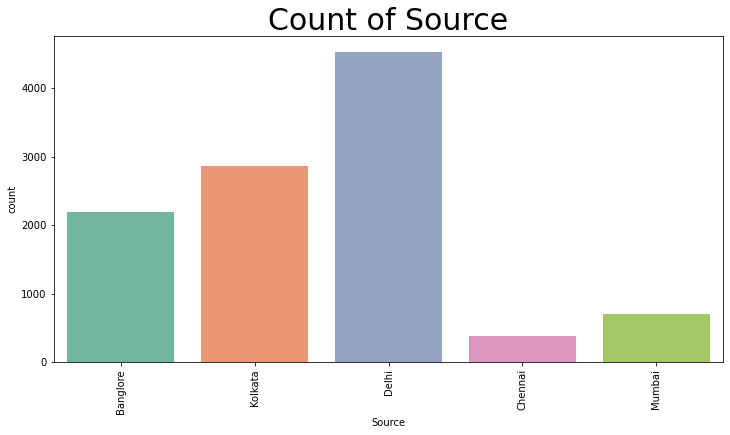

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

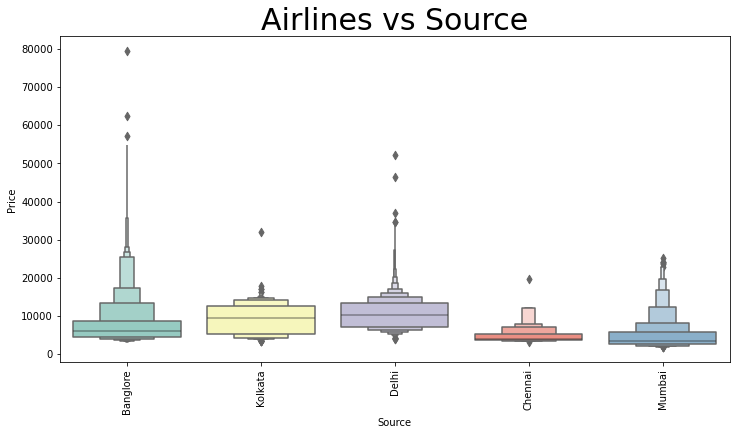

In [10]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Source'], df['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)
plt.show()

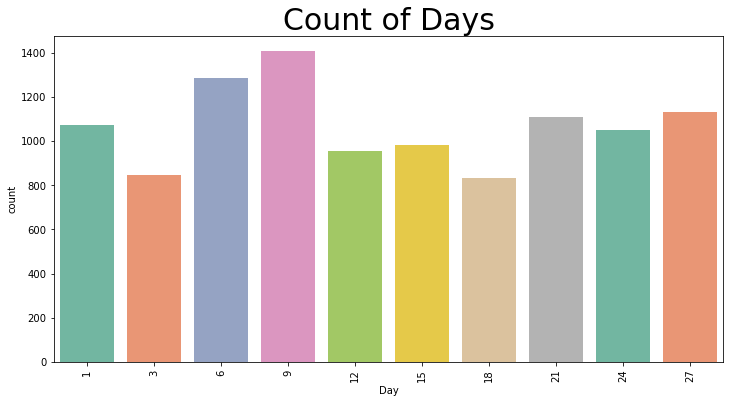

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df['Day'], palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

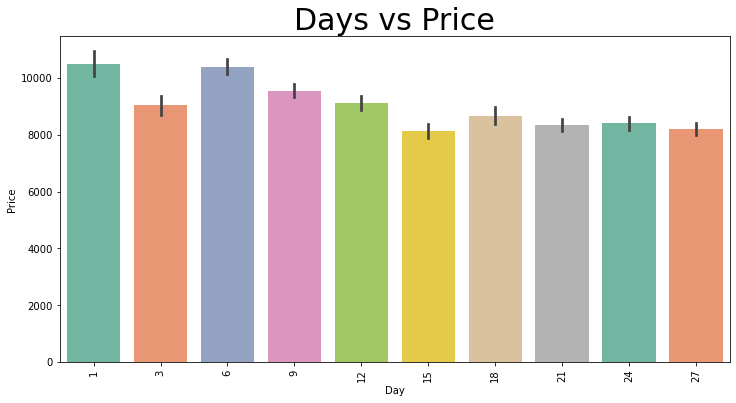

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(df['Day'], df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [13]:
df['Month'] = df['Month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})


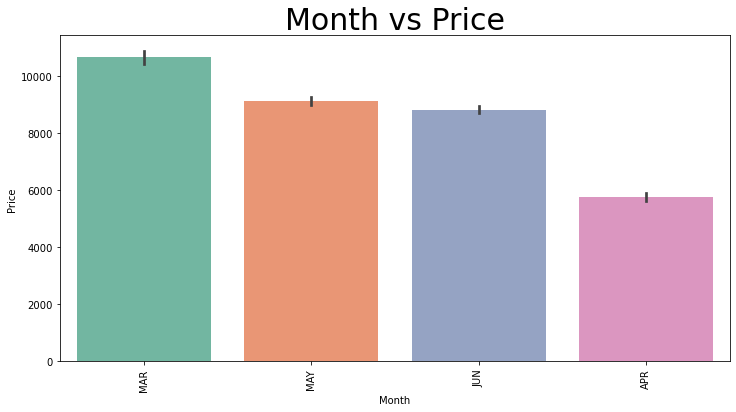

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(df['Month'], df['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [15]:
df['Duration_Hr'],_ = df['Duration_Hr'].str.split('h',1).str

In [16]:
df['Duration_Hr'] = df['Duration_Hr'].astype(int)

In [17]:
df['Duration_bool'] = (df['Duration_Hr']*60)+df['Duration_Min']

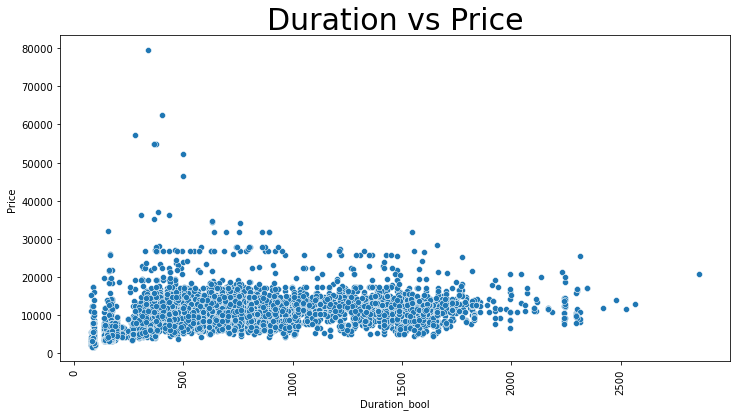

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Duration_bool'], df['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

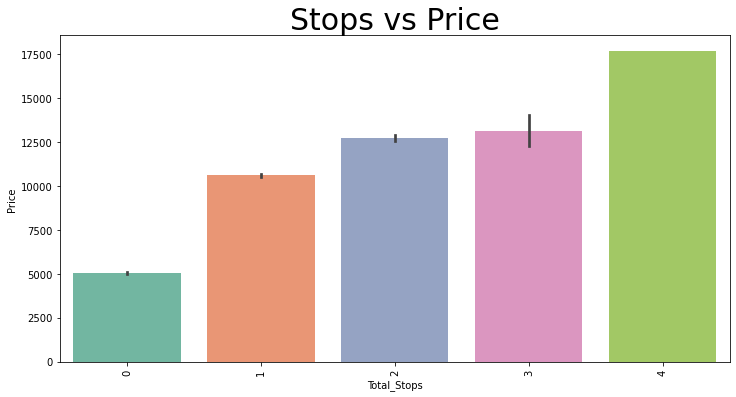

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

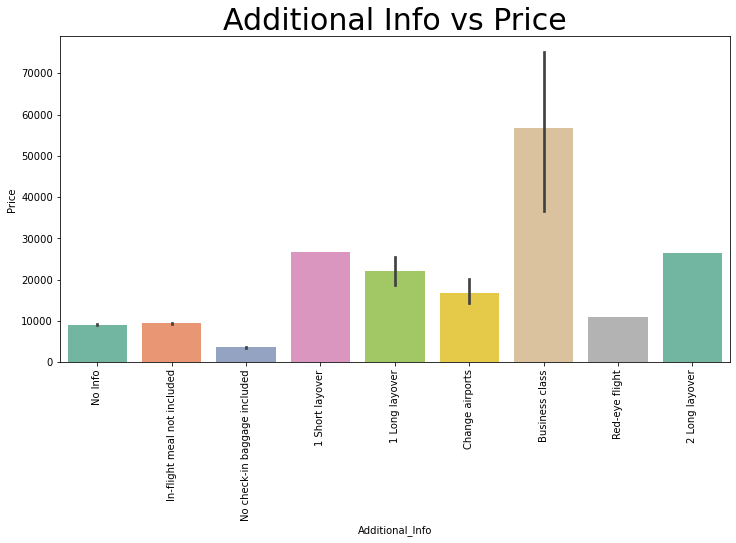

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [21]:
ncol=["Duration_bool"]          
for i in ncol:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df = df.drop(df[df.loc[:,i] <= min].index)
    df = df.drop(df[df.loc[:,i] >= max].index)

In [22]:
df = df.dropna()

In [23]:
df.to_csv('Final.csv', index=None)

In [ ]:
d